Setup
1. upload amazon.csv into google drive and then mount via the code block below
2. Set up path for the data file after mounting (change path if needed)
3. Import required libraries
4. in comments i will label 1-21 as assigned points and 22-26 as the extra 5 unique points 

In [1]:
# uses amazon.csv in the google drive
# mounting from google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# path of the .csv file change if needed
path = "/content/drive/MyDrive/Colab Notebooks/amazon.csv"

In [3]:
# 1) import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 2) read csv files 
df = pd.read_csv(path)

In [5]:
# 3a) Find what is the type of ‘date’ column is
df['date'].dtype
# a dtype of 'O' is type object

dtype('O')

In [6]:
# 3b) If it is of ‘object’ type, we need to convert the type into datetime
# 3c) For conversion you need to make changes again in read_csv method, put third parameter
# into it for parsing dates (you need to figure out by yourself regarding third parameter)
df = pd.read_csv(path,parse_dates=['date'])

In [7]:
df['date'].dtype

dtype('<M8[ns]')

In [8]:
# 22) i will determine that a dataype of <M8[ns] is the same as datetime64[ns] and prove it
# source is this stackoverflow link -> https://stackoverflow.com/questions/29206612/difference-between-data-type-datetime64ns-and-m8ns
# TLDR: machine that operates on little endianness no difference between these 2 types
# however on an machine that operates on big endianness this would be false and the specific datatype would be >M8[ns]
# endianness is the order of sequence in which bytes are stored in memory
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [9]:
# 4) display first 5 rows
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [10]:
# 5) check last 5 rows
df.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [11]:
# 6) Find shape of our dataset (number of rows and number of columns)
df.shape

(6454, 5)

In [12]:
# 6a) Kindly print number of rows and columns separately
rows, cols = df.shape
print("the rows of our dataset is {} \nthe columns in our dataset is {}".format(rows,cols))

the rows of our dataset is 6454 
the columns in our dataset is 5


In [13]:
# 7) Getting information about our dataset like total number rows, total number of columns,
# datatypes of each column and memory requirement.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [14]:
# 8) Check for duplicate data and drop them.
# 8a) You can use duplicated () method
df[df.duplicated()]

,year,state,month,number,date
259,2017,Alagoas,Janeiro,38.0,2017-01-01
2630,1998,Mato Grosso,Janeiro,0.0,1998-01-01
2650,1998,Mato Grosso,Fevereiro,0.0,1998-01-01
2670,1998,Mato Grosso,Mar�o,0.0,1998-01-01
2690,1998,Mato Grosso,Abril,0.0,1998-01-01
2710,1998,Mato Grosso,Maio,0.0,1998-01-01
3586,1998,Paraiba,Janeiro,0.0,1998-01-01
3606,1998,Paraiba,Fevereiro,0.0,1998-01-01
3621,2013,Paraiba,Fevereiro,9.0,2013-01-01
3626,1998,Paraiba,Mar�o,0.0,1998-01-01


In [15]:
# 8b) there is 32 duplicate rows
len(df[df.duplicated()])

32

In [16]:
df.shape[0]

6454

In [17]:
df2 = df.drop(df[df.duplicated()].index)

In [18]:
df2.shape[0]

6422

In [19]:
df.shape[0]

6454

In [20]:
# df2 is now the dataframe that contains the new dataset with 32 dropped duplicated rows
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6422 non-null   int64         
 1   state   6422 non-null   object        
 2   month   6422 non-null   object        
 3   number  6422 non-null   float64       
 4   date    6422 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 301.0+ KB


In [21]:
# 9) check null values in dataset
df2.isnull().values.any() # returns False meaning no null values exists in this dataset
# in the case that i did find 1/or more null values in the dataset
# i would run df2.isnull().sum() -> returns how many null values in the set
# then replace/remove/filter/etc.. move on according to what i wanted to achieve with these null values

False

In [22]:
# 10) Get overall statistics about the data frame.
# 10a) Here you will find that you are getting only numerical columns
df2.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


In [23]:
# 10b) Kindly show categorical columns as well, if you find any warning then kindly add extra parameter in method.
df2.describe(include='all', datetime_is_numeric=True) # include='all' -> simply says describe entire data(all columns) and not just the numerical data (default = None)
# datetime_is_numeric = True tells the function that there will be datetime types are to pass them as numeric values is fine (default = False)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [24]:
#!pip install googletrans
#!pip uninstall googletrans==4.0.0-rc1
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
# 11) Rename month names to english.
# 11a) You will change data as some columns are in different languages, you need to change them into english
from googletrans import Translator
translator = Translator()
df2['month'].describe()

count       6422
unique        12
top       Agosto
freq         540
Name: month, dtype: object

In [26]:
value = list(set(df2['month'].values))[2]
value2 =list(set(df2['month'].values))[-1]
#translator.translate(value , dest='en').text,value
lang = translator.detect(df2['month']).lang
# pt -> Portuguese

In [27]:
#tmp = df2['month'].head()
#tmp.apply(lambda month_pt: translator.translate(month_pt, dest='en').text)
allmonths = list(set(df2['month'].values))
translated = pd.Series(allmonths).apply(lambda month_pt: translator.translate(month_pt, dest='en').text)
#df2['month_eng'] = df2['month'].apply(lambda x: translator.translate(x, dest='en').text)
translated

0      December
1       October
2     September
3         April
4      February
5          July
6       January
7           May
8         Mar�o
9          June
10       August
11     November
dtype: object

In [28]:
#translated.tail(1)
# isolating Mar�o idk what happened in the conversion but this is march 
#filter = translated.values[-1]

In [29]:
#month_eng = df2['month'].apply(lambda month_pt: translator.translate(month_pt, dest='en').text) # ReadTimeout: The read operation timed out (2mins) lmao

In [30]:
# maybe an rdd is more efficient than dataframes

In [31]:
#!pip install pyspark

In [32]:
#import pyspark as spark 
#from pyspark.sql import SQLContext

#sqlContext = SQLContext(sc)
#sqlContext.createDataFrame(pandas_df)

#spark_df = spark.createDataFrame(df2)
#rdd = spark_df.rdd
# scratch this back to pandas i don't think this dataset is large enough for me to switch to apache spark

In [33]:
# probably wrote the previous apply function wrong
# this will take about 4-5 mins
month_eng = df2['month'].apply(translator.translate, src = lang, dest='en').apply(getattr, args=('text',))
# took 4 minutes 

In [34]:
month_eng

0        January
1        January
2        January
3        January
4        January
          ...   
6449    December
6450    December
6451    December
6452    December
6453    December
Name: month, Length: 6422, dtype: object

In [35]:
len(month_eng)

6422

In [36]:
len(df2['month'])

6422

In [37]:
list(set(month_eng.values))

['July',
 'January',
 'November',
 'March',
 'October',
 'April',
 'September',
 'march',
 'December',
 'May',
 'February',
 'August',
 'June']

In [38]:
#df3 = df2.replace(to_replace = df2['month'],value = month_eng,regex=True)
#df3.head()
df3 = df2

In [39]:
df3.month = month_eng
df3.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


In [40]:
# double checking that its in english
translator.detect(df3['month']).lang, "accuracy of " + str(translator.detect(df3['month']).confidence*100 )+ "%"

('en', 'accuracy of 95.08119%')

In [41]:
list(set(df3['month'].values))

['July',
 'January',
 'November',
 'March',
 'October',
 'April',
 'September',
 'march',
 'December',
 'May',
 'February',
 'August',
 'June']

In [42]:
# 12) Total number of fires registered
# idk why its a double but round down and .sum()
str(df3['number'].astype(int).sum()) + " fires registered"

'698438 fires registered'

In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6422 non-null   int64         
 1   state   6422 non-null   object        
 2   month   6422 non-null   object        
 3   number  6422 non-null   float64       
 4   date    6422 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 301.0+ KB


In [44]:
# 13) In which month maximum number of forest fires were reported?
# 13a) You need to create proper stats and showing them with the help of bar plot
# 13b) Mention in your comment what did you observe
#df3.index = pd.to_datetime(df3['date'],format='%y/%m/%d')
#df3.groupby(by = [df3.index.month, df3.index.year]).sum()
#df3.index
# date and times are wrong in 4th column

In [45]:
df4 = df3
df4 = df4['number'].astype(int)
themonths = df4.groupby(by = [df3['month']])
themonths.sum()

month
April        28184
August       87970
December     57513
February     30839
January      47680
July         92295
June         55990
March         1159
May          34723
November     85471
October      88600
September    58464
march        29550
Name: number, dtype: int64

In [46]:
themonths.sum().max() #looks like July is our month

92295

In [47]:
# 13a) You need to create proper stats and showing them with the help of bar plot
# df4.groupby(by = [df3['month']]).sum()
#for name, group in themonths:
    #print(name)
themonths.sum().keys()

Index(['April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'march'],
      dtype='object', name='month')

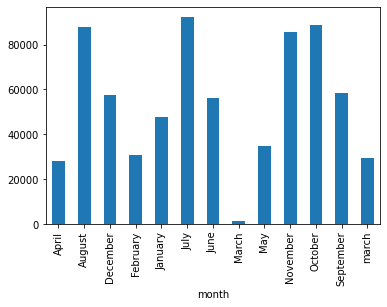

In [48]:
#sns.barplot(x = themonths.sum().keys(), y = themonths.sum().values, data = themonths.sum())
#plt.show()
# 13b) Mention in your comment what did you observe
# i obsereved that march has the lowest fires and july has the highest fires reported
themonths.sum().plot.bar()

plt.show()

In [159]:
# 23) Months minimum number of forest fire reported
themonths.sum().min()
# month is March 

1159

In [49]:
# 14) In which year maximum number of forest fires was reported?
df5 = df3
df5 = df5['number'].astype(int)
theyears = df5.groupby(by = [df3['year']])
theyears.sum()

year
1998    19999
1999    26869
2000    27341
2001    29039
2002    37369
2003    42737
2004    38424
2005    34984
2006    33811
2007    33008
2008    29363
2009    39103
2010    37015
2011    34619
2012    40065
2013    35121
2014    39601
2015    41184
2016    42189
2017    36597
Name: number, dtype: int64

In [50]:
theyears.sum().max()
# seems like the year 2003 was the highest

42737

In [160]:
theyears.sum().min()
# 24) the year 1998 was the lowest number of fires reported

19999

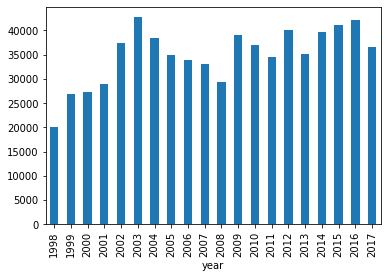

In [51]:
# 14a) Please visualize your output with barplot
theyears.sum().plot.bar()
plt.show()

In [52]:
# 15) In which state maximum number of forest fires was reported?
# df3 data after months have been translated
# df4 groupedby months
# df5 groupedby years
# df6 groupedby states
df6 = df3.drop(df3.columns[[0,2,4]], axis=1)
df6 = df6['number'].astype(int)
thestates = df6.groupby(by = [df3['state']])
thestates.sum()

state
Acre                18452
Alagoas              4606
Amapa               21831
Amazonas            30636
Bahia               44718
Ceara               30415
Distrito Federal     3561
Espirito Santo       6546
Goias               37677
Maranhao            25082
Mato Grosso         96178
Minas Gerais        37453
Paraiba             52423
Par�                24459
Pernambuco          24498
Piau                37777
Rio                 45094
Rondonia            20259
Roraima             24384
Santa Catarina      24359
Sao Paulo           51118
Sergipe              3237
Tocantins           33675
Name: number, dtype: int64

In [53]:
thestates.sum().max()
# mato grosso

96178

In [162]:
thestates.sum().min()
# 25) minimumm fire reported state Sergipe

3237

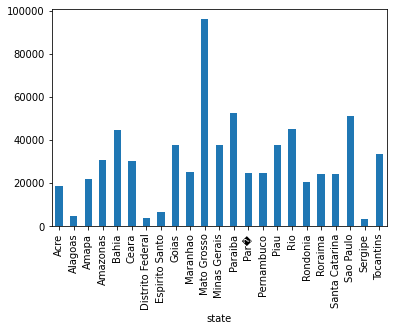

In [54]:
# 15a) Visualization should be there
# 15b) If find that barplot is overlapping, then please fix it using rotation -> looks fine to me
thestates.sum().plot.bar()
plt.show()

In [55]:
# 16) Find total number of fires were reported in amazonas (state of brazil)
# 16a) Add in comment the number of reports 
#thestates.sum()
for name, number in thestates:
  if name.lower() == "amazonas":
    print(number.sum())
#total fires reported is 30636

30636


In [56]:
# 17) Display number of fires were reported in amazon (year-wise)
# 17a) Kindly visualize it using barplot after having groupby
# 17b) Please take care of plot overlapping (it should be neat and clean)
df7 = df3
# df7 = df7['number'].astype(int)
# df[df['ids'].str.contains("ball")]
# drop states first before grouping by year and states
df7 = df7[df7['state'].str.contains("Amazonas")]
filter = df7.groupby(['year' ,'state'])
theamazonyears = filter.sum()
theamazonyears

,,number
year,state,
1998,Amazonas,946.000
1999,Amazonas,1061.000
2000,Amazonas,853.000
2001,Amazonas,1297.000
2002,Amazonas,2852.000
2003,Amazonas,1524.268
2004,Amazonas,2298.207
2005,Amazonas,1657.128
2006,Amazonas,997.640


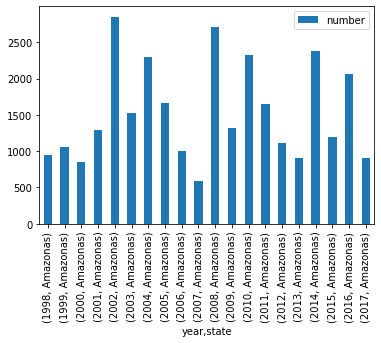

In [57]:
theamazonyears.plot.bar()
plt.show()

In [120]:
# 18) Display number of fires were reported in amazon (day-wise)
# 18a) You need to visualize the result using weekdays name
# Don’t forget to mention your observation in comment
df8 = df3
df8 = df8[df8['state'].str.contains("Amazonas")]
df8['date'].apply(lambda time : time.dayofweek)
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
tmp = df8['date']
tmp2 = tmp.apply(lambda time : time.dayofweek)
tmp2 = tmp2.to_frame()
tmp2['date']
df8['weekdays'] = tmp2['date'].map(days)
df8.head()
df8 = df8.drop(df8.columns[[0,1,2,4]],axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [123]:
amazonas_days = df8.groupby(['weekdays'])
amazonas_days.sum()

,number
weekdays,
Fri,5446.480
Mon,1886.601
Sat,4162.666
Sun,3015.186
Thu,5754.802
Tue,6474.217
Wed,3910.177


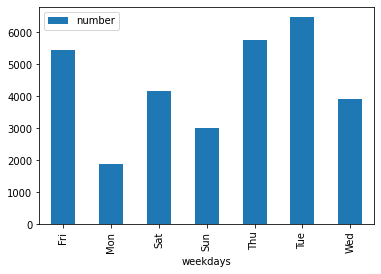

In [124]:
#amazonas_days.sum()
amazonas_days.sum().plot.bar()
plt.show()

In [59]:
# 19) Find total number of fires were reported in 2015 and visualize data based on each ‘month’
# 19a) Showing output with beautiful barplot
# 19b) Mention your observation in comment
df9 = df3[df3['year'] == 2015]
df9 = df3['number'].astype(int)
df9.sum()

698438

In [60]:
df10 = df3
df10 = df10[df10['year'] == 2015]
monthsonyear2015 = df10.groupby(['month','year'])
#tmp = monthsonyear2015.sum()
#tmp2 = tmp.drop(tmp.columns[0],axis=1)
monthsonyear2015.sum()

,,number
month,year,
April,2015,2573.000
August,2015,4363.125
December,2015,4088.522
February,2015,2309.000
January,2015,4635.000
July,2015,4364.392
June,2015,3260.552
May,2015,2384.000
November,2015,4034.518


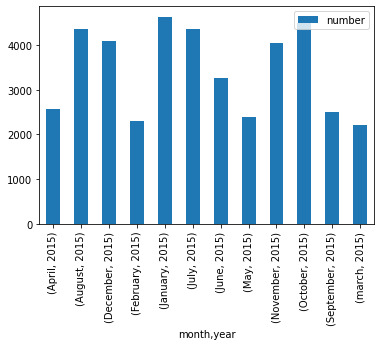

In [61]:
monthsonyear2015.sum().plot.bar()
plt.show()

In [135]:
# 20) Find average number of fires were reported from highest to lowest (state-wise).
# 20a) Visualization should be there with proper observation
state_avg_fires = df3
#df8 = df8.drop(df8.columns[[0,1,2,4]],axis = 1)
state_avg_fires = state_avg_fires.drop(state_avg_fires.columns[[0]], axis = 1)

In [140]:
state_avg_fires = df3['number'].astype(int)
tmp = state_avg_fires.groupby(by = [df3['state']])
tmp.mean()

state
Acre                 77.205021
Alagoas              19.271967
Amapa                91.343096
Amazonas            128.184100
Bahia               187.104603
Ceara               127.259414
Distrito Federal     14.899582
Espirito Santo       27.389121
Goias               157.644351
Maranhao            104.945607
Mato Grosso         203.336152
Minas Gerais        156.707113
Paraiba             111.065678
Par�                102.338912
Pernambuco          102.502092
Piau                158.062762
Rio                  64.697274
Rondonia             84.765690
Roraima             102.025105
Santa Catarina      101.920502
Sao Paulo           213.882845
Sergipe              13.543933
Tocantins           140.899582
Name: number, dtype: float64

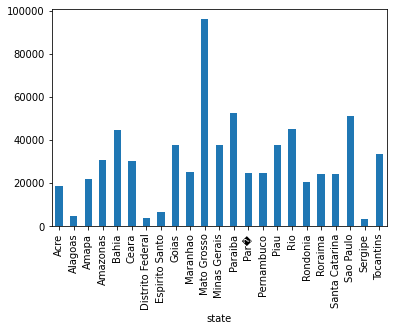

In [141]:
tmp.sum().plot.bar()
plt.show()

In [144]:
# 21) To find the state names where fires were reported in 'dec' month
fires_in_dec = df3
fires_in_dec = fires_in_dec.drop(df3.columns[[0]], axis = 1)

,state,month,number,date
0,Acre,January,0.0,1998-01-01
1,Acre,January,0.0,1999-01-01
2,Acre,January,0.0,2000-01-01
3,Acre,January,0.0,2001-01-01
4,Acre,January,0.0,2002-01-01


In [152]:
fires_in_dec['number'] = fires_in_dec['number'].astype(int)
fires_in_dec = fires_in_dec[fires_in_dec['month'].str.contains("December")]
fires_in_dec

,state,month,number,date
220,Acre,December,7,1998-01-01
221,Acre,December,0,1999-01-01
222,Acre,December,0,2000-01-01
223,Acre,December,0,2001-01-01
224,Acre,December,1,2002-01-01
...,...,...,...,...
6449,Tocantins,December,128,2012-01-01
6450,Tocantins,December,85,2013-01-01
6451,Tocantins,December,223,2014-01-01
6452,Tocantins,December,373,2015-01-01


In [153]:
fires_in_dec.groupby(['state','month']).sum()

,,number
state,month,
Acre,December,47
Alagoas,December,964
Amapa,December,4504
Amazonas,December,2224
Bahia,December,4559
Ceara,December,5247
Distrito Federal,December,5
Espirito Santo,December,239
Goias,December,1007


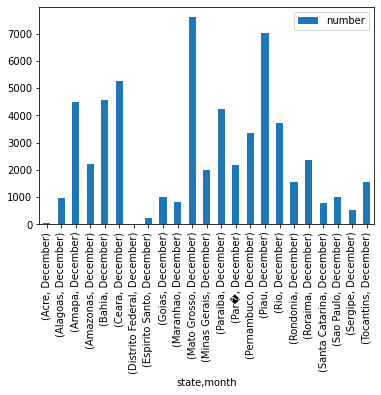

In [155]:
fires_in_dec.groupby(['state','month']).sum().plot.bar()
plt.show()

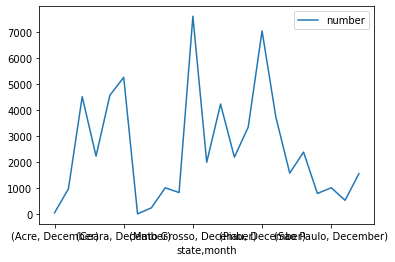

In [164]:
# 26 Line plot, horizontal bar plot, histogram, etc.. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html
fires_in_dec.groupby(['state','month']).sum().plot.line()
plt.show()

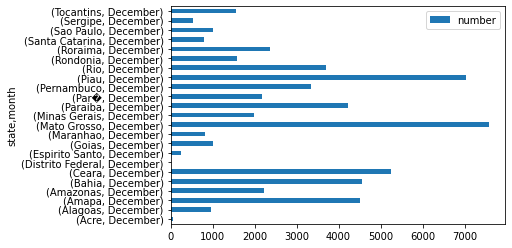

In [167]:
fires_in_dec.groupby(['state','month']).sum().plot.barh()
plt.show()

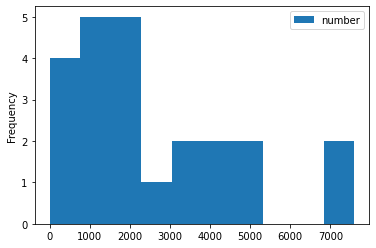

In [168]:
fires_in_dec.groupby(['state','month']).sum().plot.hist()
plt.show()
